# 1.IMPORT LIBRARIES

In [7]:
!pip install pydotplus

In [8]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [9]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# 2. DATA PREPARATION

 ### 2.1 READ THE DATA

In [10]:
df_admissions = pd.read_csv('Admission_predict.csv')
df_admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,1
1,2,324,107,4,4.000000,4.500000,8.870000,1,1
2,3,316,104,3,3.000000,3.500000,8.000000,1,0
3,4,322,110,3,3.500000,2.500000,8.670000,1,1
4,5,314,103,2,2.000000,3.000000,8.210000,0,0


### 2.2 CHECK THE DATA TYPES

In [11]:
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB


In [12]:
df_admissions.shape

(400, 9)

In [13]:
df_admissions['Chance of Admit'].value_counts()

Chance of Admit
0    220
1    180
Name: count, dtype: int64

In [14]:
df_admissions['Research'] = df_admissions['Research'].astype(object)

In [15]:
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

### 2.3 Remove Insignificant Variables

In [16]:
df_admissions = df_admissions.drop('Serial No.', axis = 1)

### 2.4 Distribution of Variables

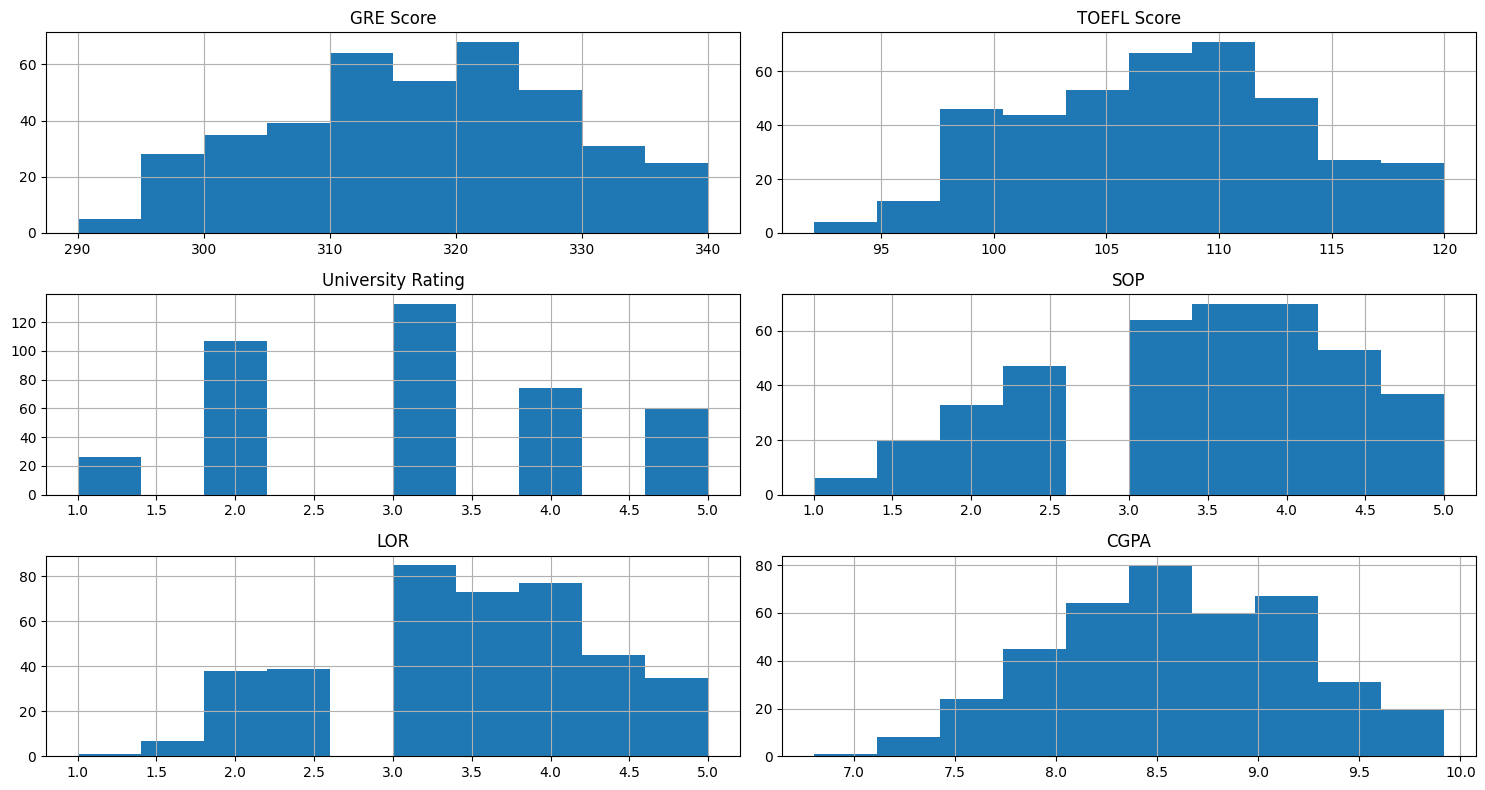

Skewness:


GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: object

In [17]:
df_admissions.drop('Chance of Admit', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df_admissions.drop('Chance of Admit', axis = 1).skew()

<function matplotlib.pyplot.show(close=None, block=None)>

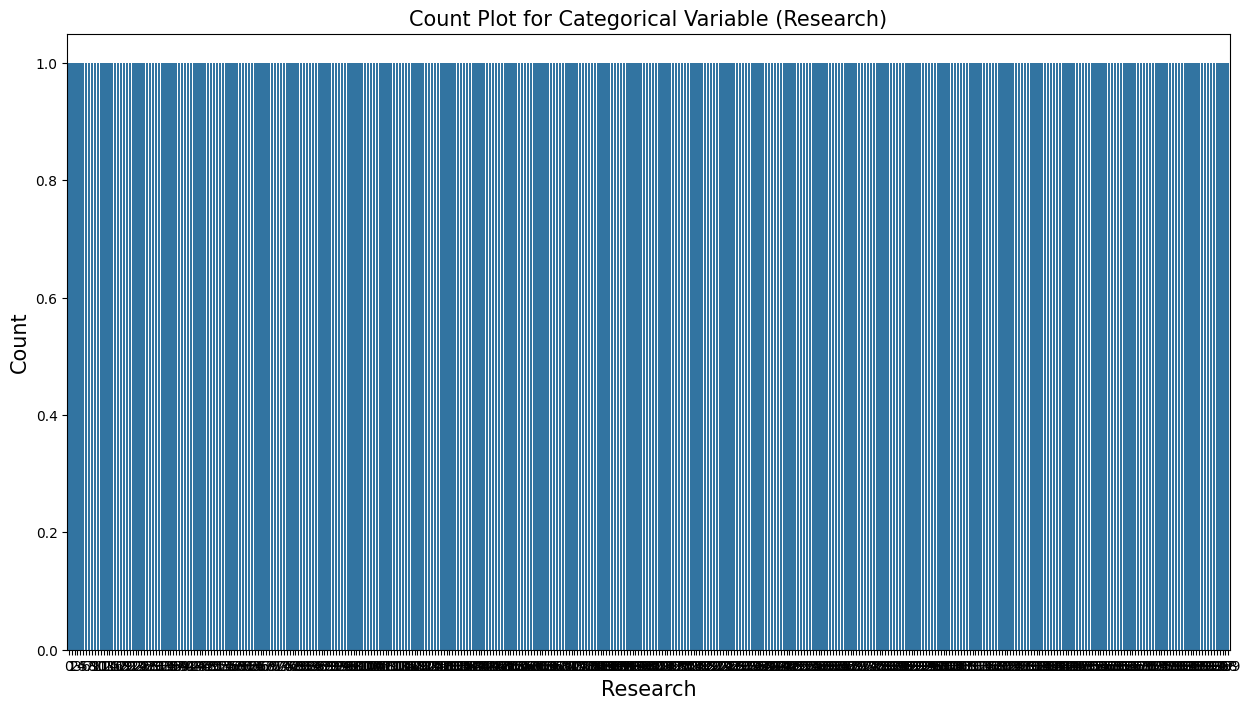

In [18]:
sns.countplot(df_admissions.Research)
plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.xlabel('Research', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show

### 2.5 Missing Value Treatment

In [19]:
df_admissions.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### 2.6 Dummy Encode the Categorical Variables

In [20]:
##Split the dependent and independent variables.
df_target=df_admissions['Chance of Admit']
df_feature=df_admissions.drop('Chance of Admit', axis = 1)

In [21]:
##Filter numerical and categorical variables
df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [22]:
df_cat = df_feature.select_dtypes(include = [object])
df_cat.columns

Index(['Research'], dtype='object')

In [23]:
#Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.
dummy_var = pd.get_dummies(data = df_cat, drop_first = True , dtype = 'int8' )
dummy_var.head()

,Research_1
0,1
1,1
2,1
3,1
4,0


In [24]:
#Concatenate numerical and dummy encoded categorical variables
X= pd.concat([df_num, dummy_var],axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,337,118,4,4.500000,4.500000,9.650000,1
1,324,107,4,4.000000,4.500000,8.870000,1
2,316,104,3,3.000000,3.500000,8.000000,1
3,322,110,3,3.500000,2.500000,8.670000,1
4,314,103,2,2.000000,3.000000,8.210000,0


### 2.7 Train-Test Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('Y_train', Y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)

X_train (320, 7)
Y_train (320,)
X_test (80, 7)
Y_test (80,)


In [26]:
logestic_model = LogisticRegression().fit(X_train,Y_train)
logestic_model

LogisticRegression()

### Create a generalized function to calculate the metrics for the train and the test set

In [27]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(Y_train, train_pred))

In [28]:
def get_test_report(model):
    test_pred=model.predict(X_test)
    return(classification_report(Y_test, test_pred))

In [29]:
def get_confusion_matrix(model):
    test_pred=model.predict(X_test)
    cm= confusion_matrix(Y_test,test_pred)
    return cm

In [30]:
train_report = get_train_report(logestic_model)

print('Train Report:\n', train_report)

Train Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       178
           1       0.86      0.82      0.84       142

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [31]:
test_report=get_test_report(logestic_model)

print('Test Report:\n',test_report)

Test Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.75      0.79      0.77        38

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.78        80



In [32]:
cm = get_confusion_matrix(logestic_model)
cm

array([[32, 10],
       [ 8, 30]])

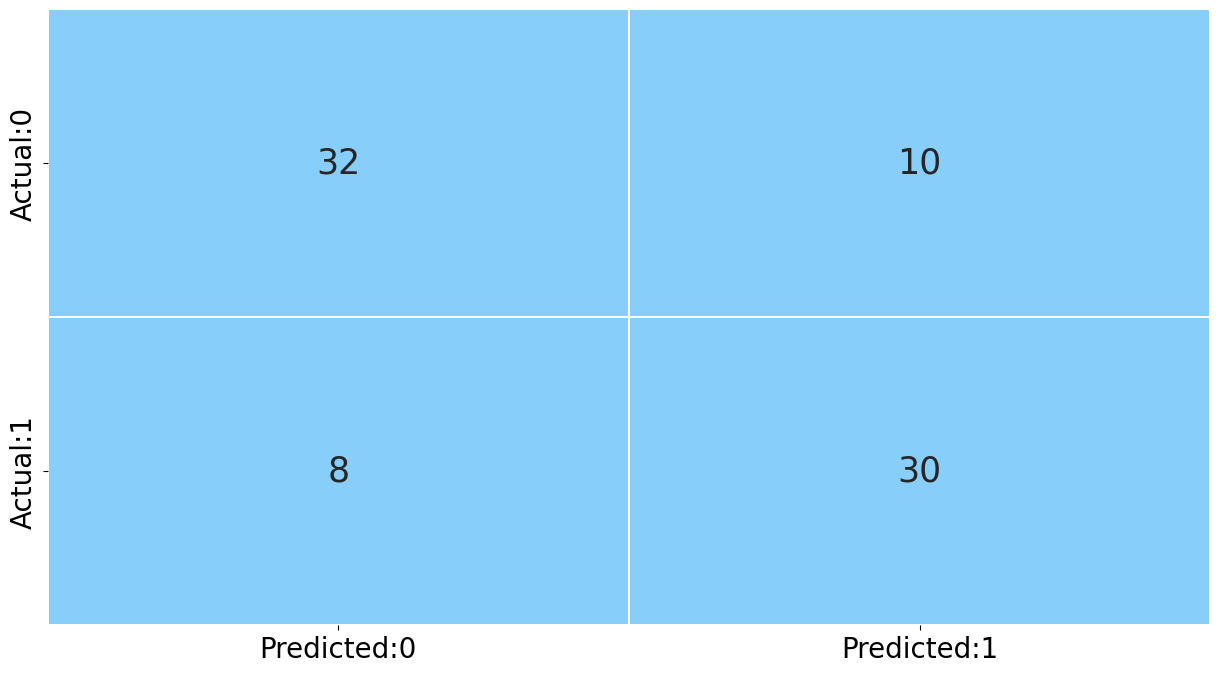

In [33]:
cm = get_confusion_matrix(logestic_model)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# 3. Decision Tree for Classification

### Build a full decision tree model on a train dataset using 'entropy'.

In [34]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, Y_train)

#### Calculate performance measures on the train set.

In [35]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



#### Calculate performance measures on the test set.

In [36]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



#### Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

#### If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [37]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)
decision_tree = dt_model.fit(X_train, Y_train)

In [38]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       178
           1       0.94      0.85      0.89       142

    accuracy                           0.91       320
   macro avg       0.91      0.90      0.90       320
weighted avg       0.91      0.91      0.91       320



In [39]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



#### Interpretation: From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### 3.1 Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [40]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train, Y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 2} 



### Build the model using the tuned hyperparameters.

In [41]:
#Build the model using the tuned hyperparameters
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
dt_model = dt_model.fit(X_train, Y_train)

#### Plot the decision tree with tuned hyperparameters.

##### Calculate performance measures on the train set.

In [42]:
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       178
           1       0.93      0.74      0.82       142

    accuracy                           0.86       320
   macro avg       0.88      0.85      0.85       320
weighted avg       0.87      0.86      0.86       320



##### Calculate performance measures on the test set.

In [43]:
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



#### Interpretation: From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

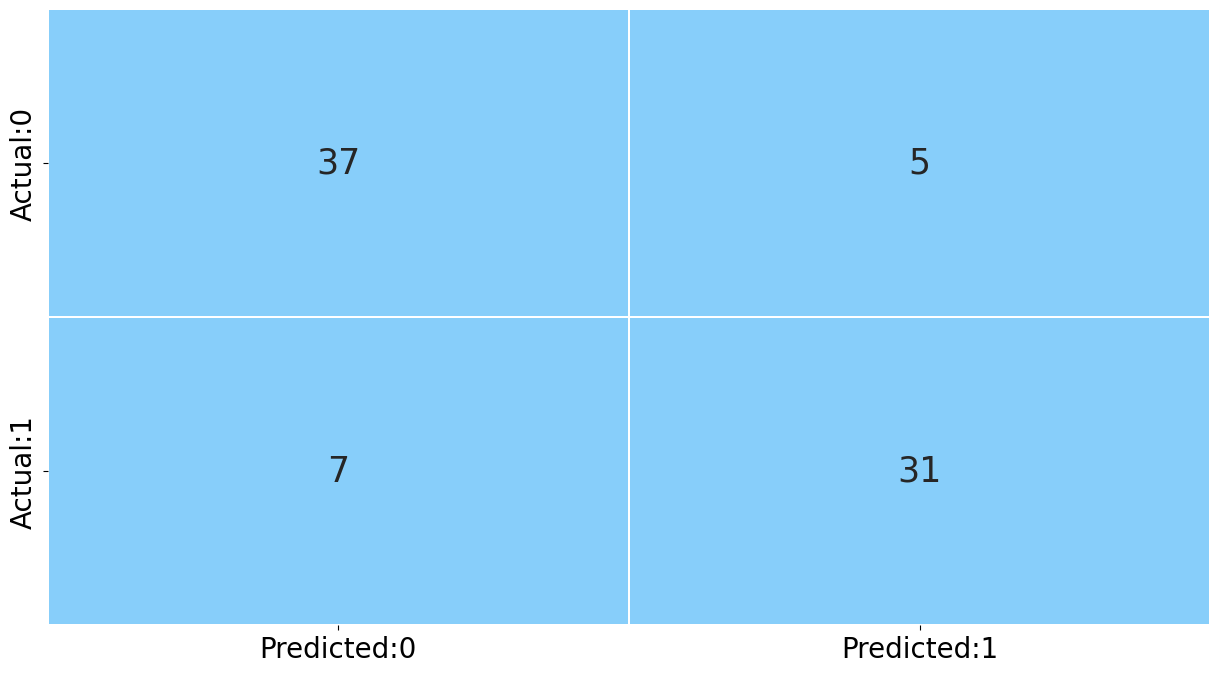

In [44]:
cm = get_confusion_matrix(decision_tree)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# 4. Random Forest for Classification

In [45]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, Y_train)

##### Calculate performance measures on the train set.

In [46]:
train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       178
           1       1.00      0.99      0.99       142

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



##### Calculate performance measures on the test set.

In [47]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        42
           1       0.77      0.87      0.81        38

    accuracy                           0.81        80
   macro avg       0.82      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80



### 4.1 Tune the Hyperparameters using GridSearchCV (Random Forest)

In [48]:
parameters = {
    'criterion': ['entropy', 'gini'],  # Criterion used to measure the quality of a split.
    'n_estimators': [10, 30, 50, 70, 90],  # Number of trees in the forest.
    'max_depth': [10, 15, 20],  # Maximum depth of each decision tree in the forest.
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split.
    'min_samples_split': [2, 5, 8, 11],  # Minimum samples needed to split an internal node.
    'min_samples_leaf': [1, 5, 9],  # Minimum samples that a leaf node must have.
    'max_leaf_nodes': [2, 5, 8, 11]  # Maximum number of leaf nodes in a decision tree.
}

In [49]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train, Y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50} 



### Build the model using the tuned hyperparameters.

In [50]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
rf_model = rf_model.fit(X_train, Y_train)
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.80      0.87      0.84        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [51]:
cm = get_confusion_matrix(rf_model)
cm

array([[34,  8],
       [ 5, 33]])

#### Interpretation: The accuracy of the test dataset increased from 0.81 to 0.84 after tuning of the hyperparameters. Also, the sensitivity and specificity of the model are balanced.

## Identify the Important Features

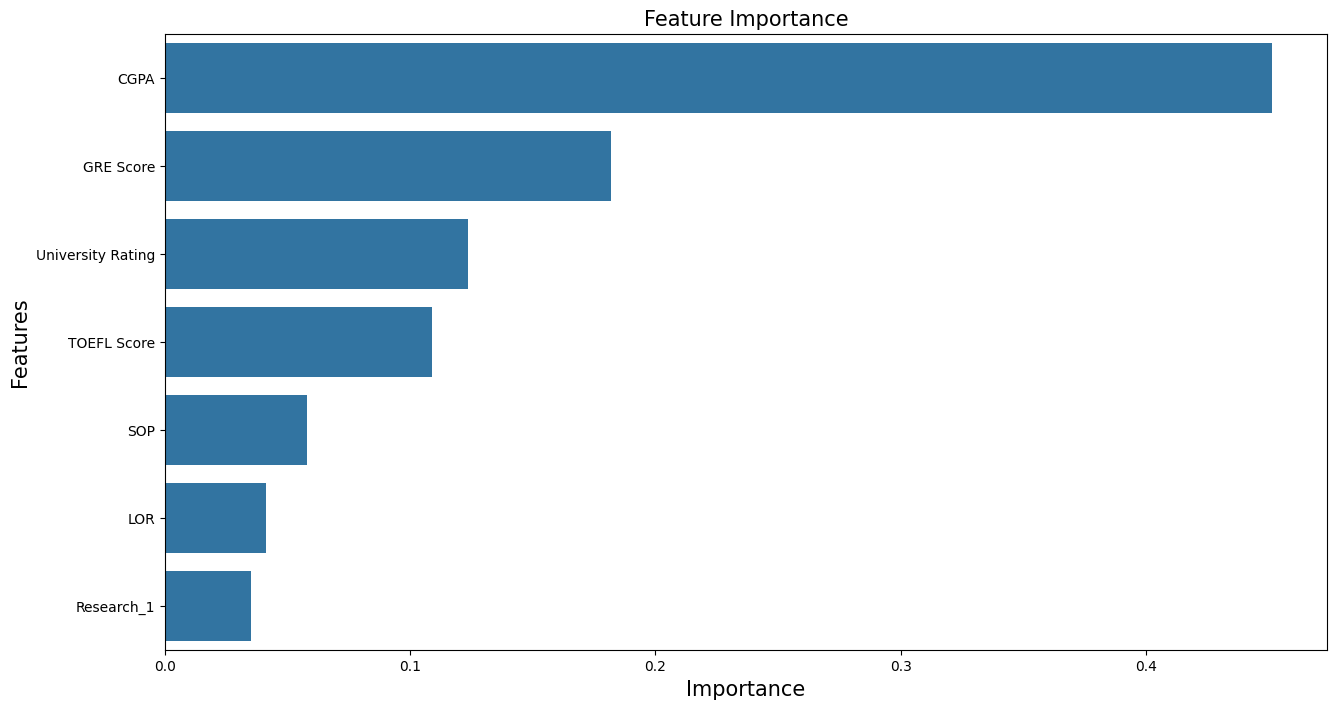

In [52]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

**Interpretation:** From the above bar plot, we can see that `CGPA` is the most important feature in the dataset.